In [135]:
# Import the packages we'll use for our analysis

import pandas as pd
import datetime
import requests
import seaborn as sns
import matplotlib.pyplot as plt

# Use line magic function to enable matplotlib to work interactively with iPython

%matplotlib inline
%pylab inline

#Set style
plt.style.use("seaborn-whitegrid")
pylab.rcParams["figure.figsize"] = (8,6)
#sns.palplot(sns.color_palette("Blues_d"))

Populating the interactive namespace from numpy and matplotlib


In [134]:
url =  r'https://api.coinmarketcap.com/v1/ticker/?limit=0'
data= requests.get(url)
json=data.json()
df=pd.DataFrame(json)
df.head(10)

,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,17860300000.0,16790575.0,bitcoin,1515452961,250800818775,21000000.0,Bitcoin,-1.37,-9.57,9.41,1.0,14937.0,1,BTC,16790575.0
1,8235600000.0,96857624.0,ethereum,1515452950,109402623989,None,Ethereum,-3.25,-0.83,40.4,0.0772901,1129.52,2,ETH,96857624.0
2,3161890000.0,38739144847.0,ripple,1515452941,92654737079.0,100000000000,Ripple,-4.31,-28.91,5.89,0.00016366,2.39176,3,XRP,99993093880.0
3,1383490000.0,16900800.0,bitcoin-cash,1515452953,40029375792.0,21000000.0,Bitcoin Cash,-2.34,-15.32,-3.85,0.16207,2368.49,4,BCH,16900800.0
4,257542000.0,25927070538.0,cardano,1515452955,22925778780.0,45000000000.0,Cardano,-2.85,-12.3,23.52,0.00006051,0.884241,5,ADA,31112483745.0
5,81256400.0,8999999999.0,nem,1515452944,14588369998.0,None,NEM,-2.77,-10.49,53.36,0.00011092,1.62093,6,XEM,8999999999.0
6,1145190000.0,54672708.0,litecoin,1515452941,13622580000.0,84000000.0,Litecoin,-2.65,-13.79,5.93,0.0170498,249.166,7,LTC,54672708.0
7,243722000.0,17879940477.0,stellar,1515452943,11226564307.0,None,Stellar,-3.3,-9.47,28.19,0.00004296,0.627886,8,XLM,103570548975
8,311961000.0,2779530283.0,iota,1515452950,10458121666.0,2779530283.0,IOTA,-3.38,-9.17,-4.33,0.00025746,3.76255,9,MIOTA,2779530283.0
9,1573610000.0,65748192475.0,tron,1515452953,9925741625.0,None,TRON,-4.71,-17.49,191.83,0.00001033,0.150966,10,TRX,100000000000


In [94]:
count = df["market_cap_usd"].count()
print "The count of total currencies today is {}\n".format(count)

df["market_cap_usd"]  = pd.to_numeric(df["market_cap_usd"])
mc = df["market_cap_usd"].sum()
print "The toal market cap is $ {}\n".format('{0:,.0f}'.format(mc))

The count of total currencies today is 1085

The toal market cap is $ 744,601,096,934



In [95]:
mc_other = df["market_cap_usd"][9:].sum()
print "The market cap of coins lower than 9th in rank is ${}".format('{0:,.0f}'.format(mc_other))
df2 = pd.DataFrame([["other",mc_other]], columns=["id","market_cap_usd"])

The market cap of coins lower than 9th in rank is $166,121,805,049


In [139]:
df_mc = df[["id","market_cap_usd"]][:9]
df_mc["market_cap_usd"]  = pd.to_numeric(df_mc["market_cap_usd"], downcast='integer')
df_mc = df_mc.append(df2, ignore_index = True)
df_mc["total_usd"] = mc
df_mc["pct_of_market"] = (df_mc["market_cap_usd"] / df_mc["total_usd"]) 
df_mc

,id,market_cap_usd,total_usd,pct_of_market
0,bitcoin,2.508008e+11,7.446011e+11,0.336826
1,ethereum,1.094026e+11,7.446011e+11,0.146928
2,ripple,9.265474e+10,7.446011e+11,0.124435
3,bitcoin-cash,4.002938e+10,7.446011e+11,0.053759
4,cardano,2.292578e+10,7.446011e+11,0.030789
5,nem,1.458837e+10,7.446011e+11,0.019592
6,litecoin,1.362258e+10,7.446011e+11,0.018295
7,stellar,1.122656e+10,7.446011e+11,0.015077
8,iota,1.045812e+10,7.446011e+11,0.014045
9,other,1.661218e+11,7.446011e+11,0.223102


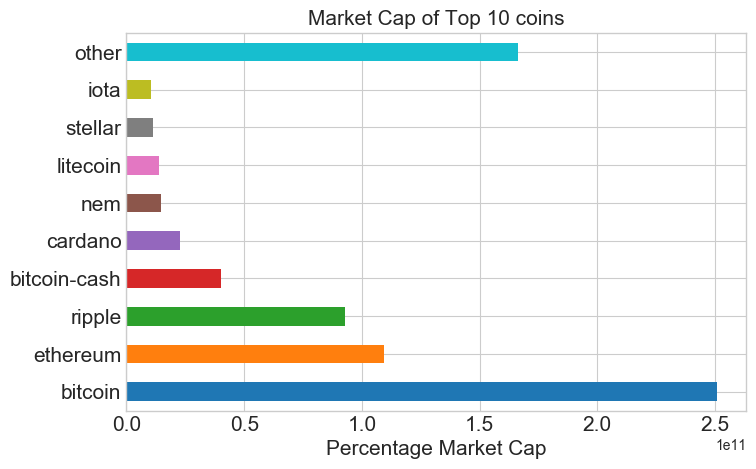

In [140]:
top_10 = df_mc[["id","market_cap_usd"]].set_index("id")
ax = top_10["market_cap_usd"].plot.barh(grid = True, fontsize = 15, figsize  = (8,5))
ax.set_xlabel("Percentage Market Cap", fontsize = 15)
ax.set(ylabel = "")
ax.set_title("Market Cap of Top 10 coins",fontsize = 15)